In [2]:
# import statements 
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [32]:
path='C:/Users/seayc/Documents/science/miguel/models/'
path
h1 = mr.MesaData(path+'a_0.03au_hoff_history.data')
h2 = mr.MesaData(path+'a_0.03au_history.data')
h3 = mr.MesaData(path+'history.data')

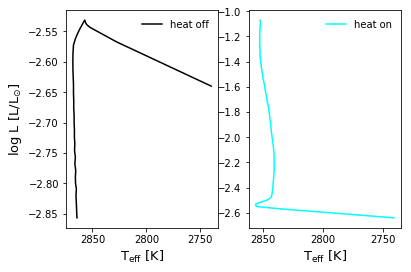

In [48]:
#plt.xlim(3.43,3.46)
fig = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
plt.subplot(1,2,1)
plt.gca().invert_xaxis()
plt.xlabel('T$_{\mathrm{eff}}$ [K]',fontsize = 13)
plt.ylabel(r'log L [L/L$_{\odot}$]',fontsize = 13)
plt.plot(10**h1.log_Teff,h1.log_L,c='k',label='heat off') # hr diagram
plt.legend(loc='best',frameon=False)

plt.subplot(1,2,2)
plt.gca().invert_xaxis()
plt.xlabel('T$_{\mathrm{eff}}$ [K]',fontsize = 13)
plt.plot(10**h2.log_Teff,h2.log_L,c='cyan',label='heat on')
plt.legend(loc='best',frameon=False)

# plt.subplot(1,3,3)
# plt.gca().invert_xaxis()
# plt.xlabel('T$_{\mathrm{eff}}$ [K]',fontsize = 13)
# plt.plot(10**h3.log_Teff,h3.log_L,c='g',label='heat on')
# plt.legend(loc='best,frameon=False

age3 = h3.star_age
# plt.savefig('hr-diag.png')
# print(age3/1e9)

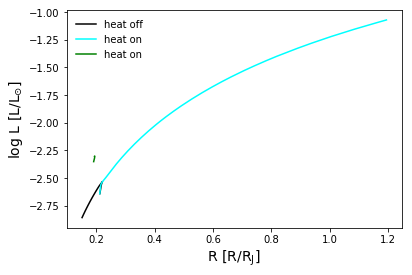

In [49]:
plt.xlabel(r'R [R/R$_{\mathrm{J}}$]', fontsize = 14)
plt.ylabel(r'log L [L/L$_{\odot}$]',fontsize = 14)
plt.plot(10**h1.log_R,h1.log_L,label='heat off',c='k') # radii
plt.plot(10**h2.log_R,h2.log_L,label='heat on',c='cyan')
plt.plot(10**h3.log_R,h3.log_L,label='heat on',c='g')
plt.legend(loc='best',frameon=False)
# plt.savefig('radii.png')

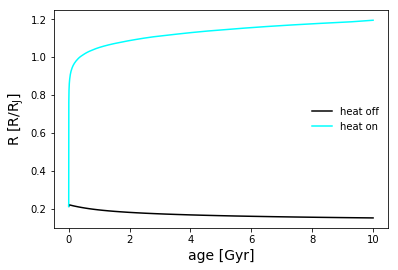

In [50]:
plt.xlabel('age [Gyr]',fontsize = 14)
plt.ylabel(r'R [R/R$_{\mathrm{J}}$]', fontsize = 14)
plt.plot(h1.star_age/1e9,10**h1.log_R,label='heat off',c='k') # radii
plt.plot(h2.star_age/1e9,10**h2.log_R,label='heat on',c='cyan')
# plt.plot(h3.star_age/1e9,10**h3.log_R,label='heat on',c='g')
plt.legend(loc='best',frameon=False)
# plt.savefig('radii.png')

# below we find plots following the evolution of the model grid

In [28]:
grid_path = 'C:/Users/seayc/Documents/science/miguel/grid_miguel_2019/grid_internal_heat_on_with_gyre/' \
            '1mj/met1.5/300cdi/a/0.03au/LOGS/'
l = mr.MesaLogDir(grid_path)
grid_path

'C:/Users/seayc/Documents/science/miguel/grid_miguel_2019/grid_internal_heat_on_with_gyre/1mj/met1.5/300cdi/a/0.03au/LOGS/'

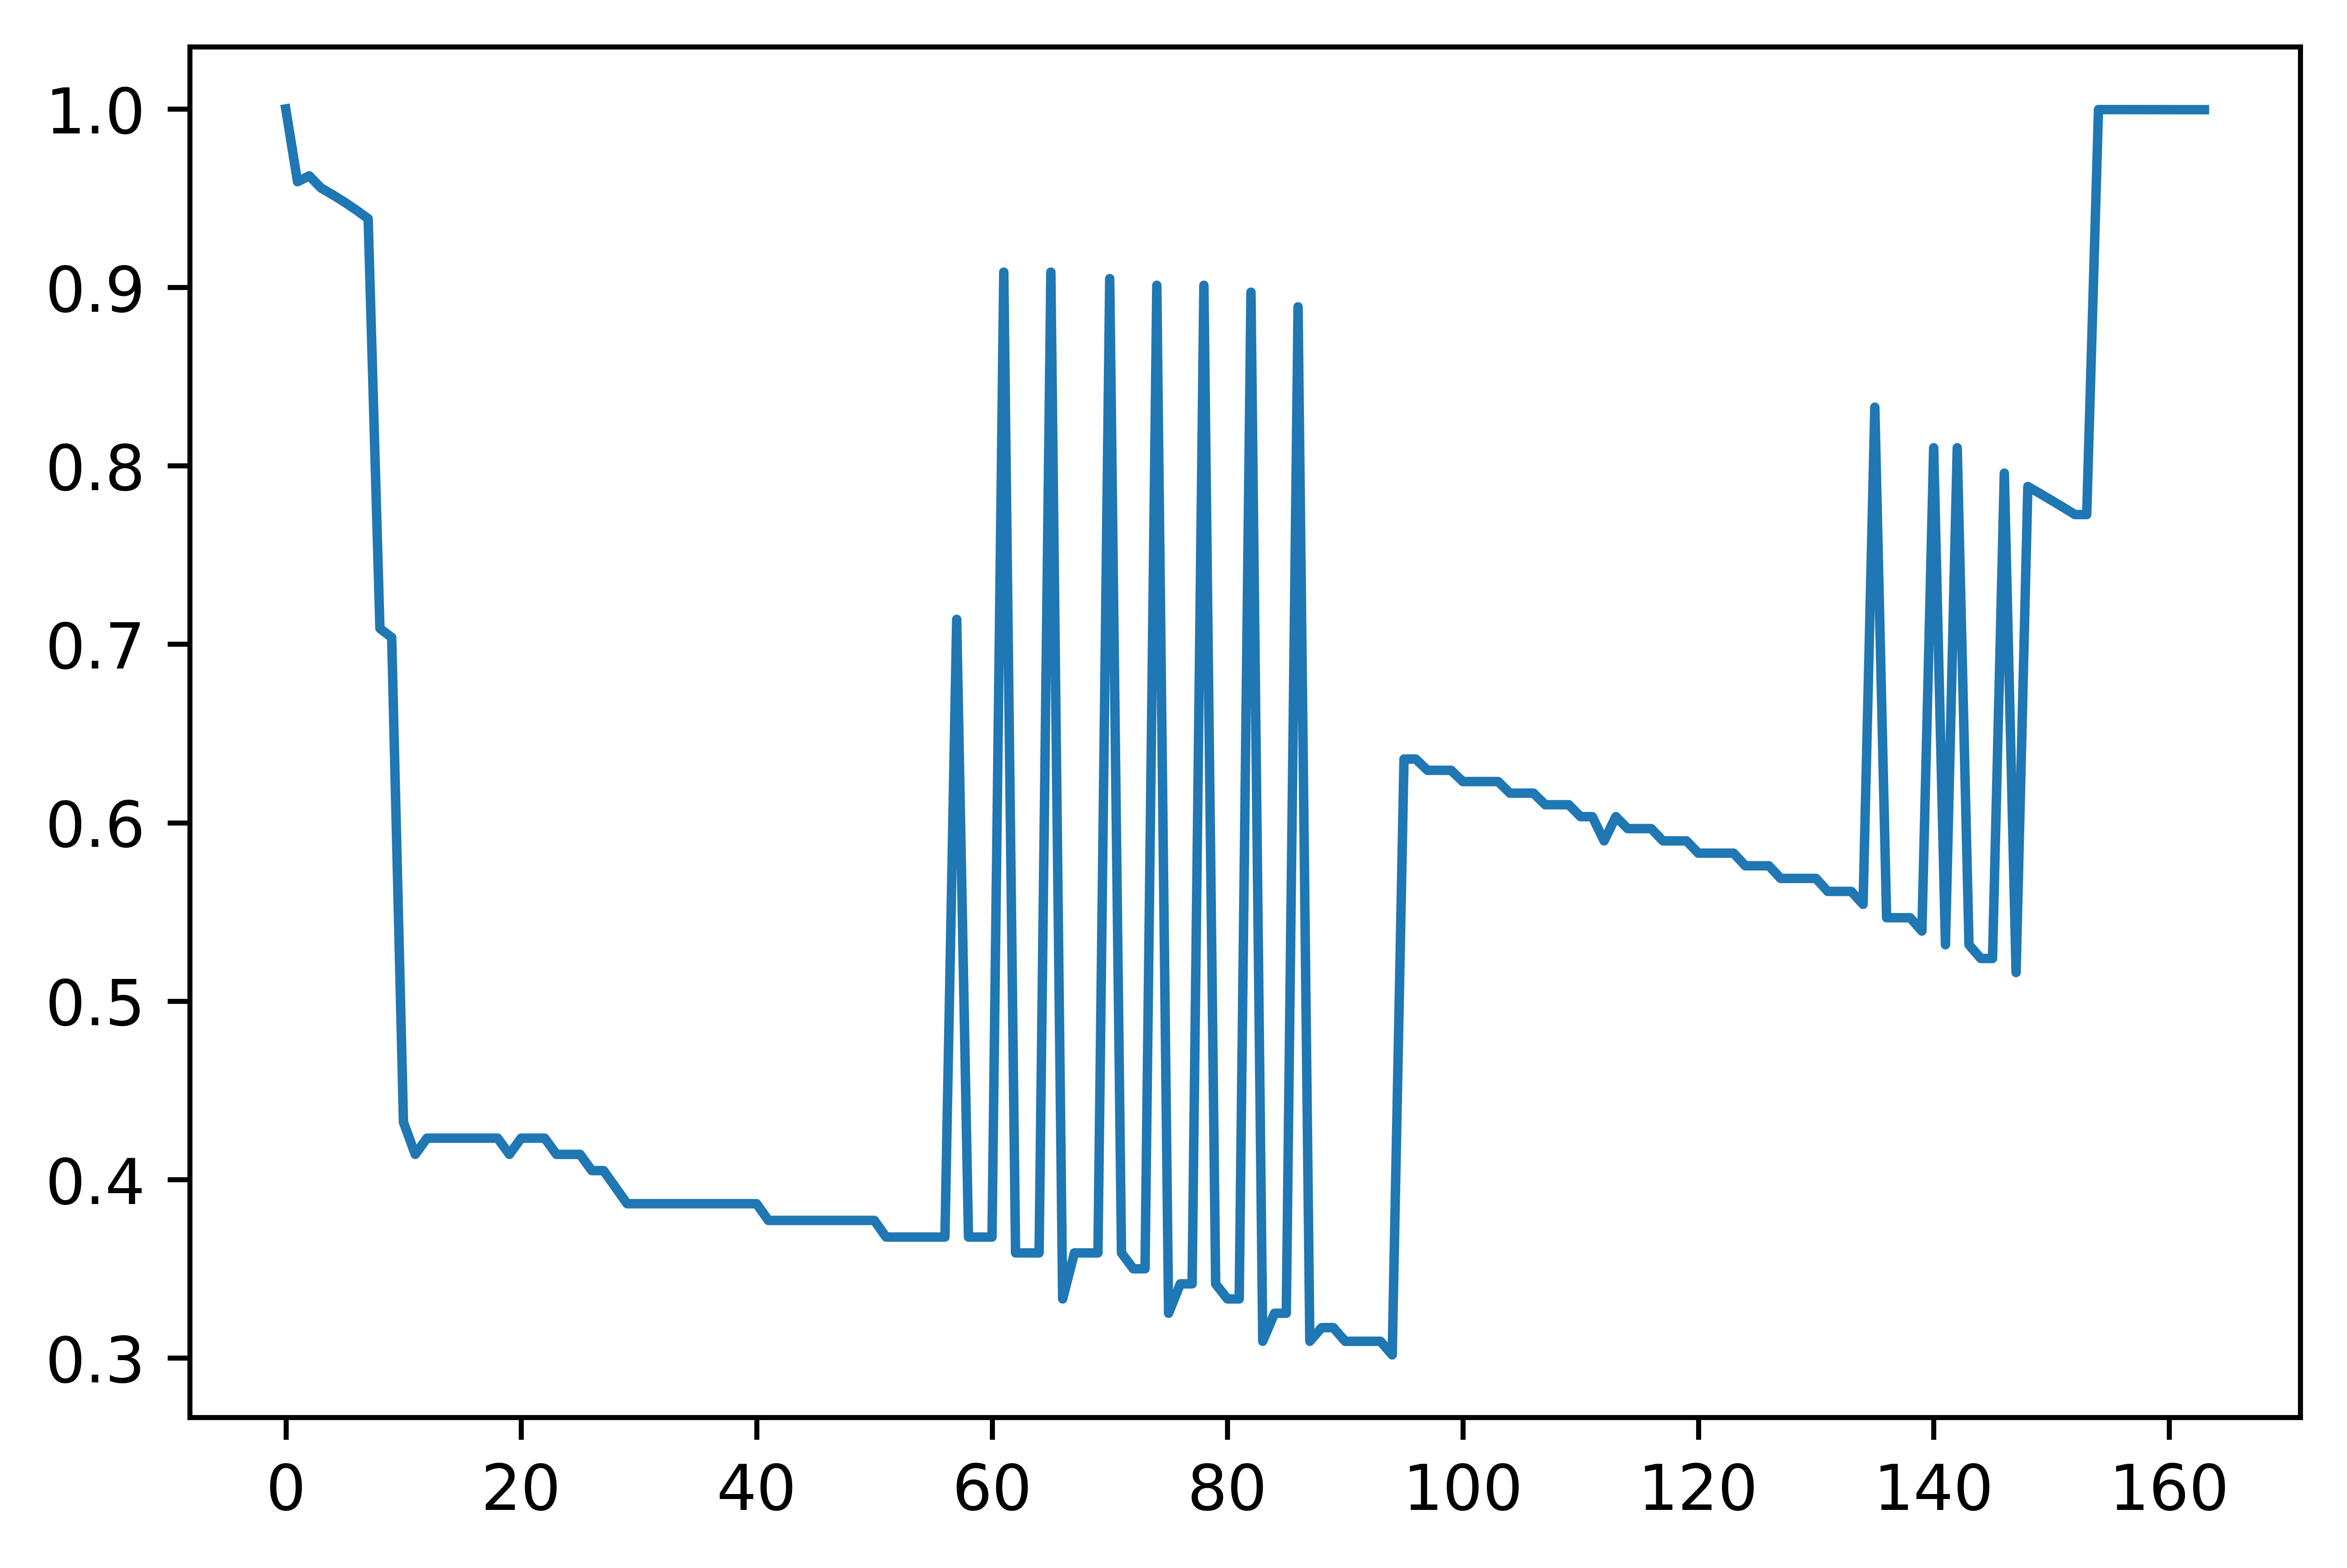

In [55]:
# convection zone 
fig = plt.figure(dpi=1000)
hist = mr.MesaData(grid_path+'history.data')
age = hist.star_age/1e9
conv_top = hist.conv_mx1_top
conv_bot = hist.conv_mx1_bot
plt.plot(conv_top)

In [ ]:
# convection zones
fig = plt.figure(dpi=1000)
prof = l.profile_data(profile_number=7) # final_profile
y = prof.star_age
print(f'profile is {round(y/1e9,6)} billion years old')
plt.semilogy(prof.R,prof.grada,c='r',label='Adiabatic gradient')
plt.semilogy(prof.R,prof.gradr,c='b',label='Radiative gradient')

# plt.annotate('Convection zone', xy=(2.3, 0.38), xytext=(1.5, 0.75),arrowprops=dict(facecolor='k', shrink=0.05))

# aesthetics
plt.minorticks_off()
plt.xlim(0)
plt.yticks([0.1,1])
plt.xlabel(r'R [R/R$_\odot$]', fontsize = 13)
plt.ylabel(r'$\nabla T$ [K]', fontsize = 13)
plt.legend(frameon=False)

# plt.savefig('ms-conv.png')
plt.show()